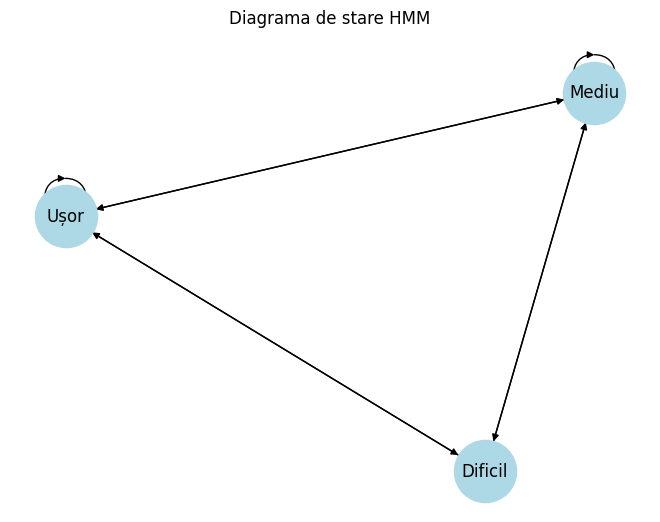

Cea mai probabilă secvență de dificultăți: ['Ușor', 'Ușor', 'Dificil', 'Ușor', 'Dificil', 'Mediu', 'Dificil', 'Ușor', 'Dificil', 'Ușor', 'Dificil', 'Mediu']
Probabilitatea acestei secvențe: 0.000000000021


In [9]:
import numpy as np
from hmmlearn import hmm
import matplotlib.pyplot as plt
import networkx as nx

states = ["Dificil", "Mediu", "Usor"]

transitions = np.array([
    [0.0, 0.5, 0.5],
    [0.5, 0.25, 0.25],
    [0.5, 0.25, 0.25]
])

emissions = np.array([
    [0.1, 0.2, 0.4, 0.3],
    [0.15, 0.25, 0.5, 0.1],
    [0.2, 0.3, 0.4, 0.1]
])

model = hmm.CategoricalHMM(n_components=3)

model.startprob_ = np.array([1/3, 1/3, 1/3])

model.transmat_ = transitions

model.emissionprob_ = emissions

G = nx.DiGraph()
for i, state in enumerate(states):
    G.add_node(state)

edges = [(states[0], states[1]), (states[0], states[2]),
         (states[1], states[0]), (states[1], states[1]), (states[1], states[2]),
         (states[2], states[0]), (states[2], states[1]), (states[2], states[2])]

for edge in edges:
    G.add_edge(edge[0], edge[1])

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue')
plt.title("Diagrama de stare HMM")
plt.show()

observations = [0, 0, 2, 1, 1, 2, 1, 1, 3, 1, 1, 2]

logprob, state_sequence = model.decode(np.array(observations).reshape(-1, 1))

probabilitate = np.exp(logprob)

print("Cea mai probabila secventa de dificultati:", [states[i] for i in state_sequence])
print(f"Probabilitatea acestei secvențe: {probabilitate:.12f}")
